<a href="https://colab.research.google.com/github/JairEsc/Aprendizaje/blob/main/CAMDA/alpha_diversity_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo muy sencillo
### Fuente: https://docs.onecodex.com/en/articles/4136553-alpha-diversity

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
muestras_ex=[[13,5,6,0,0],[5,5,5,5,4]
,[14,4,3,2,1]]

## Ejemplos de métricas de diversidad:

### Observed (Richness)

Se define como el número de especies observadas.
En nuestro ejemplo, son 3,5,5, respectivamente.

### Shannon

Es simplemente la entropía de Shannon

$$-\sum_{i=1}^R p_i log(p_i),$$
donde:

$R$ es el número de especies. En nuestro ejemplo, 5.

$p_i$ es la proporción de cada especie. $i=1,\ldots, R$.


In [53]:
def Shannon(p):
    S=0
    for p_i in p:
        if(p_i>0):
            S+=p_i*np.log(p_i)
    return -S
for i in range(3):
    print("Shannon de la muestra ",str(i+1),': ',Shannon(muestras_ex[i]/np.sum(muestras_ex[i])))

Shannon de la muestra  1 :  1.0054668293254954
Shannon de la muestra  2 :  1.6058065097995469
Shannon de la muestra  3 :  1.212465860088887


### Simpson Index

$$1-\sum_{i=1}^R p_i^2$$

In [54]:
def Simpson(p):
    return 1-np.sum(p**2)
for i in range(3):
    print("Simpson de la muestra ",str(i+1),': ',Simpson(muestras_ex[i]/np.sum(muestras_ex[i])))

Simpson de la muestra  1 :  0.6006944444444444
Simpson de la muestra  2 :  0.7986111111111112
Simpson de la muestra  3 :  0.6076388888888888


### Inverse Simpson
$$1/\sum_{i=1}^R p_i^$$

In [55]:
def InvSimpson(p):
    return 1/np.sum([r**2 for r in p])
for i in range(3):
    print("Inverse Simpson de la muestra ",str(i+1),': ',InvSimpson(muestras_ex[i]/np.sum(muestras_ex[i])))

Inverse Simpson de la muestra  1 :  2.5043478260869567
Inverse Simpson de la muestra  2 :  4.9655172413793105
Inverse Simpson de la muestra  3 :  2.548672566371681


### Chao1
Ver: http://dns2.asia.edu.tw/~ysho/YSHO-English/1000%20Taiwan%20(Independent)/PDF/Sca%20J%20Sta11,%20265.pdf

No es determinista. Utiliza Bootstrap

# Ejemplo menos sencillo

CAMDA 2023. Limitado a muestras de abundancia de virus en Tokio 2017 por familia.
https://github.com/ccm-bioinfo/cambda2023/blob/main/02_variable_selection/data/assembly/assemblyViruses_count__Family.csv


In [19]:
A=pd.read_csv("familia.csv", index_col=0)
A.head()

,CAMDA23_MetaSUB_gCSD17_TOK_10,CAMDA23_MetaSUB_gCSD17_TOK_11,CAMDA23_MetaSUB_gCSD17_TOK_12,CAMDA23_MetaSUB_gCSD17_TOK_13,CAMDA23_MetaSUB_gCSD17_TOK_14,CAMDA23_MetaSUB_gCSD17_TOK_15,CAMDA23_MetaSUB_gCSD17_TOK_16,CAMDA23_MetaSUB_gCSD17_TOK_17,CAMDA23_MetaSUB_gCSD17_TOK_18,CAMDA23_MetaSUB_gCSD17_TOK_19,...,CAMDA23_MetaSUB_gCSD17_TOK_24,CAMDA23_MetaSUB_gCSD17_TOK_25,CAMDA23_MetaSUB_gCSD17_TOK_2,CAMDA23_MetaSUB_gCSD17_TOK_3,CAMDA23_MetaSUB_gCSD17_TOK_4,CAMDA23_MetaSUB_gCSD17_TOK_5,CAMDA23_MetaSUB_gCSD17_TOK_6,CAMDA23_MetaSUB_gCSD17_TOK_7,CAMDA23_MetaSUB_gCSD17_TOK_8,CAMDA23_MetaSUB_gCSD17_TOK_9
1094892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2169803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2750282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180230,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


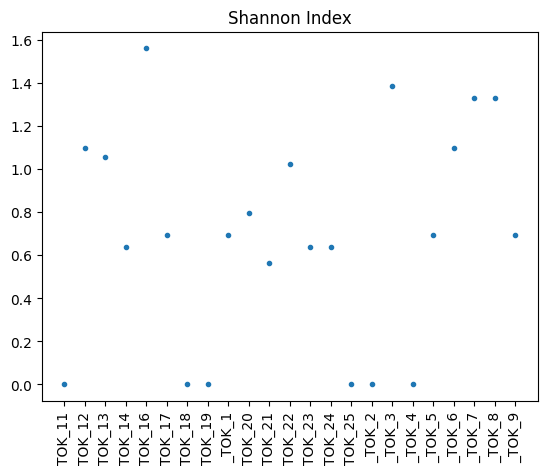

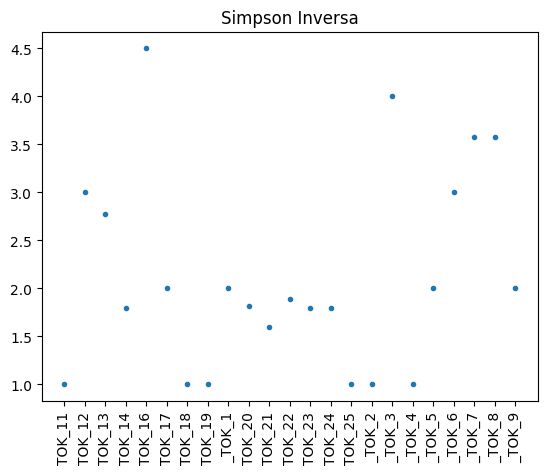

In [58]:
B=A/np.sum(A)
B = B.dropna(axis=1, how='all')
muestras=[A[-6:] for A in list(B.columns)]
Shannons=[]
InvSimpsons=[]
for name in list(B.columns):
    b_i=list(B[name])
    Shannons.append(Shannon(b_i))
    InvSimpsons.append(InvSimpson(b_i))
plt.plot(muestras,Shannons,'.')
plt.xticks(rotation=90)
plt.title('Shannon Index')
plt.show()
plt.plot(muestras,InvSimpsons,'.')
plt.xticks(rotation=90)
plt.title('Simpson Inversa')
plt.show()
